# 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from XGBoost import XGBoostClassifier
#import lightgbm as lgb
#from catboost import CatBoostClassifier

In [5]:
pip install xgboost

     |████████████████████████████████| 2.1 MB 1.8 MB/s eta 0:00:01     |██████████████████████████████  | 2.0 MB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# 导数据

In [7]:
df = pd.read_excel('default of credit card clients.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 数据基本信息

In [11]:
df.shape

(30000, 25)

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [14]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
pd.set_option('display.max_columns',100)
from IPython.display import display_html

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## 缺失值处理

In [17]:
df.isnull().sum().sort_values(ascending=False)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default payment next month    0
dtype: int64

In [18]:
per = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
per

ID                            0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT1                     0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
default payment next month    0.0
dtype: float64

In [19]:
df = df.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
## 缺失值按数据类型填充,分类型填充众数、连续性填充中位数
median_cols = ['aaaa','bbbb','cccc']
mode_cols = ['aa','bb','cc']

for col in median_cols:
    df[col].fillna(df[col].median(),inplace=True)
for col in mode_cols:
    df[col].fillna(df[col].mode(),inplace=True)

## 异常值处理

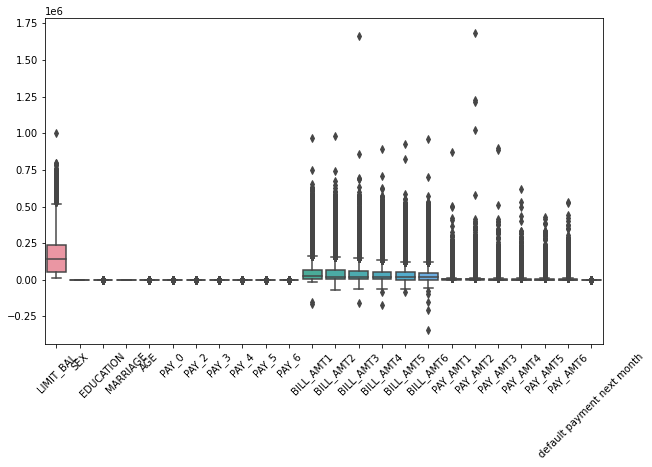

In [20]:
# 箱形图检测异常值
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [21]:
# 3-sigma处理异常值
for col in df.select_dtypes(include=[np.number]).columns:
    median = df[col].median()
    std = df[col].std()
    outliers = (df[col] - median).abs() > 3 * std
    df.loc[outliers, col] = median

In [22]:
# IQR进行异常值处理
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    upper_bound = df[col].quantile(0.95)
    lowwer_bound = df[col].quantile(0.05)
    std = df[col].std()
    df[col] = np.where(df[col] > Q3 + 1.5 * std, upper_bound, df[col])
    df[col] = np.where(df[col] < Q1 - 1.5 * std, lowwer_bound, df[col])

## 数据分析

In [23]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,164061.989333,1.603733,1.825267,1.542900,35.280900,-0.041867,-0.158867,-0.189533,-0.245500,-0.289833,-0.312400,46999.074920,45141.604827,43031.110152,39536.543620,36949.552540,35611.004267,4084.375653,4133.169238,3617.046760,3245.107892,3243.837133,3330.504100,0.221200
std,121035.014953,0.489129,0.709379,0.498164,8.718207,1.046876,1.126797,1.126078,1.084836,1.050016,1.075629,57985.830096,56093.467001,53901.849035,50116.159577,47772.314667,46791.842632,5087.343714,5655.746147,5049.413318,4557.700580,4541.105816,4953.382011,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-69777.000000,-61506.000000,-81334.000000,-81334.000000,-73895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,430000.000000,2.000000,3.000000,2.000000,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,201203.050000,194792.200000,187821.050000,174333.350000,165794.300000,161912.000000,29794.000000,39558.000000,30876.000000,27500.000000,26842.000000,30664.000000,1.000000


In [25]:
df[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,164061.989333,1.825267,1.542900,35.280900
std,121035.014953,0.709379,0.498164,8.718207
min,10000.000000,0.000000,1.000000,21.000000
25%,50000.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,41.000000
max,430000.000000,3.000000,2.000000,54.000000


In [26]:
df['EDUCATION'].value_counts().sort_values(ascending=False)

2.0    14030
1.0    10585
3.0     5371
0.0       14
Name: EDUCATION, dtype: int64

In [27]:
df['LIMIT_BAL'].value_counts().sort_values(ascending=False)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
430000.0    1558
200000.0    1528
150000.0    1110
100000.0    1048
180000.0     995
360000.0     881
60000.0      825
140000.0     749
230000.0     737
70000.0      731
210000.0     730
130000.0     729
120000.0     726
160000.0     694
90000.0      651
240000.0     619
110000.0     588
300000.0     554
170000.0     532
260000.0     521
10000.0      493
280000.0     493
220000.0     469
250000.0     350
290000.0     348
320000.0     312
310000.0     272
400000.0     271
270000.0     238
350000.0     231
40000.0      230
190000.0     229
340000.0     217
390000.0     174
330000.0     173
420000.0     168
380000.0     156
410000.0      78
370000.0      71
16000.0        2
327680.0       1
Name: LIMIT_BAL, dtype: int64

In [28]:
df['MARRIAGE'].value_counts().sort_values(ascending=False)

2.0    16287
1.0    13713
Name: MARRIAGE, dtype: int64

In [29]:
df['AGE'].value_counts().sort_values(ascending=False)

29.0    1605
27.0    1477
28.0    1409
30.0    1395
53.0    1378
26.0    1256
31.0    1217
25.0    1186
34.0    1162
32.0    1158
33.0    1146
24.0    1127
35.0    1113
36.0    1108
37.0    1041
39.0     954
38.0     944
23.0     931
40.0     870
41.0     824
42.0     794
44.0     700
43.0     670
45.0     617
46.0     570
22.0     560
47.0     501
48.0     466
49.0     452
50.0     411
51.0     340
52.0     304
54.0     247
21.0      67
Name: AGE, dtype: int64

In [30]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.041867,-0.158867,-0.189533,-0.245500,-0.289833,-0.312400
std,1.046876,1.126797,1.126078,1.084836,1.050016,1.075629
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [31]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [32]:
repay = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']]
repay = pd.melt(repay,
               id_vars='default payment next month',
               var_name='payment status',
               value_name='delay(month)'
               )
repay

,default payment next month,payment status,delay(month)
0,1.0,PAY_0,2.0
1,1.0,PAY_0,-1.0
2,0.0,PAY_0,0.0
3,0.0,PAY_0,0.0
4,0.0,PAY_0,-1.0
...,...,...,...
179995,0.0,PAY_6,0.0
179996,0.0,PAY_6,0.0
179997,1.0,PAY_6,0.0
179998,1.0,PAY_6,-1.0


In [33]:
pip install plotly_express

     |▎                               | 143 kB 16 kB/s eta 0:16:56ERROR: Exception:
Traceback (most recent call last):
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/http/client.py", line 462, in read
    n = self.readinto(b)
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/http/client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "/Users/yangzhihui/opt/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/Users/yangzhihui/opt/anaconda3/lib/pytho

In [34]:
import plotly_express as px
fig = px(repay, x='payment status', y='delay(month)',color='default payment next month')
fig.show()

ModuleNotFoundError: No module named 'plotly_express'

In [33]:
df.rename(columns={'default payment next month': "label"},inplace=True)

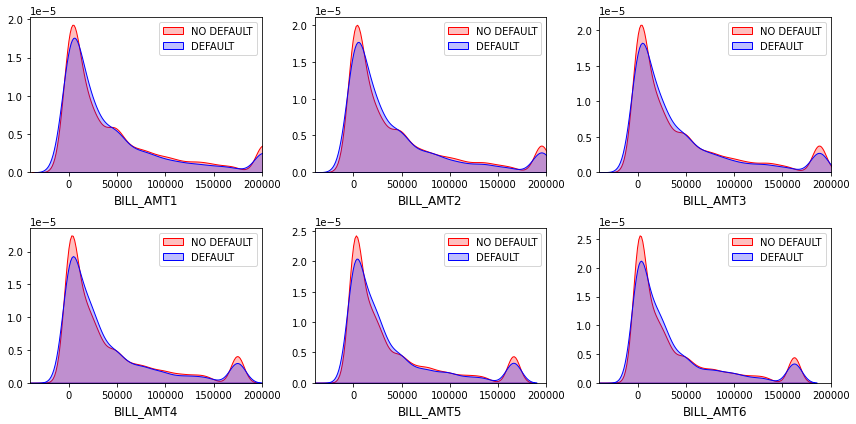

In [34]:
BILL_AMTS = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(12,6))

for i, col in enumerate(BILL_AMTS):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df.loc[(df["label"] == 0),col], label="NO DEFAULT", color="red",shade=True)
    sns.kdeplot(df.loc[(df["label"] == 1),col], label="DEFAULT", color="blue",shade=True)
    
    plt.xlim(-40000, 200000)
    plt.ylabel("")
    plt.xlabel(col, fontsize=12)
    plt.legend()
    plt.tight_layout()
    
plt.show()

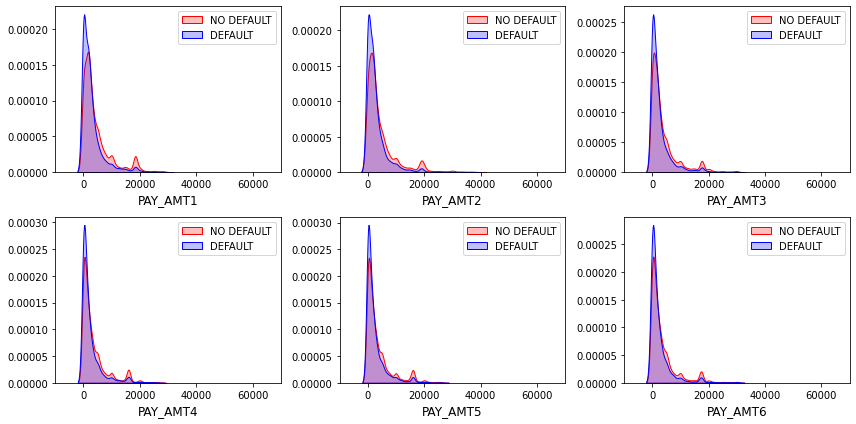

In [35]:
PAY_AMTS = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(12,6))

for i, col in enumerate(PAY_AMTS):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df.loc[(df["label"] == 0),col], label="NO DEFAULT", color="red", shade=True)
    sns.kdeplot(df.loc[(df["label"] == 1),col], label="DEFAULT", color="blue", shade=True)
    
    plt.xlim(-10000, 70000)
    plt.ylabel("")
    plt.xlabel(col, fontsize=12)
    plt.legend()
    plt.tight_layout()
    
plt.show()

In [36]:
(df['label'].value_counts()/df.shape[0] * 100).sort_values(ascending=False)

0.0    77.88
1.0    22.12
Name: label, dtype: float64

## 特征工程

In [37]:
# 相关性分析, 特征间
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'label'],
      dtype='object')

In [38]:
num_col = ['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
corr = df[num_col].corr()
corr

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
LIMIT_BAL,1.000000,0.149159,-0.285148,-0.311706,-0.300408,-0.282073,-0.262359,-0.246189,0.229623,0.223403,0.231282,0.242568,0.246141,0.239968
AGE,0.149159,1.000000,-0.047715,-0.056886,-0.058513,-0.055748,-0.061717,-0.055956,0.044505,0.042366,0.042357,0.037539,0.035006,0.032365
PAY_0,-0.285148,-0.047715,1.000000,0.652591,0.555438,0.525474,0.502000,0.473636,0.224543,0.227260,0.219395,0.215023,0.212216,0.209747
PAY_2,-0.311706,-0.056886,0.652591,1.000000,0.759990,0.662494,0.629487,0.586154,0.286619,0.285722,0.276723,0.270867,0.265548,0.263132
PAY_3,-0.300408,-0.058513,0.555438,0.759990,1.000000,0.766093,0.674019,0.623091,0.261935,0.295760,0.287664,0.283769,0.276758,0.272250
PAY_4,-0.282073,-0.055748,0.525474,0.662494,0.766093,1.000000,0.798947,0.690844,0.265617,0.293660,0.320924,0.318118,0.310004,0.304667
PAY_5,-0.262359,-0.061717,0.502000,0.629487,0.674019,0.798947,1.000000,0.799006,0.270072,0.295289,0.320935,0.352879,0.345372,0.335537
PAY_6,-0.246189,-0.055956,0.473636,0.586154,0.623091,0.690844,0.799006,1.000000,0.268556,0.292803,0.314277,0.341717,0.368479,0.359490
BILL_AMT1,0.229623,0.044505,0.224543,0.286619,0.261935,0.265617,0.270072,0.268556,1.000000,0.947487,0.901168,0.855833,0.822681,0.797386
BILL_AMT2,0.223403,0.042366,0.227260,0.285722,0.295760,0.293660,0.295289,0.292803,0.947487,1.000000,0.940301,0.891118,0.853122,0.824882


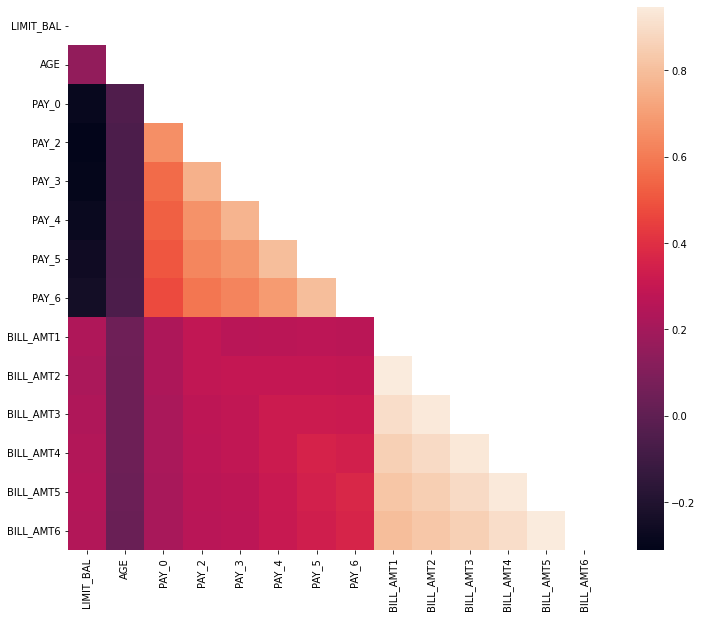

In [39]:
mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr,
           mask=mask)
plt.show()

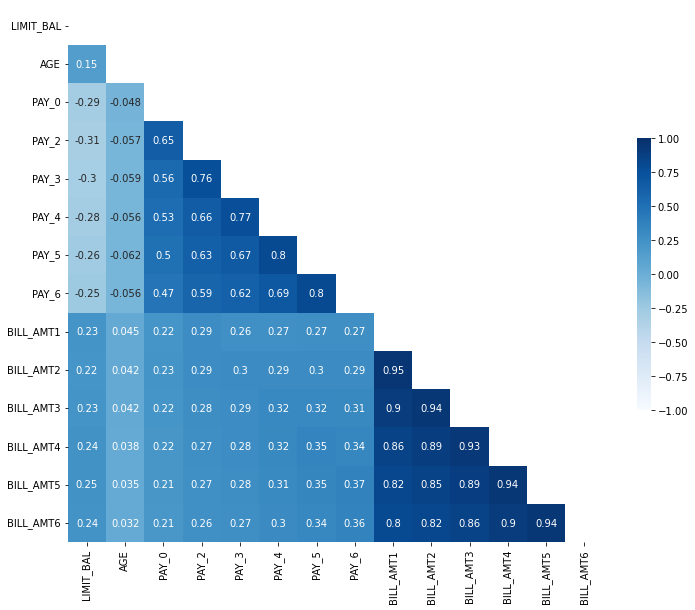

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,
           mask=mask,
           vmin=-1,
           vmax=1,
           center=0,
            square=True,
            cbar_kws={'shrink':.5},
           annot=True,
           annot_kws={'size':10},
           cmap='Blues')
plt.show()

In [41]:
# 相关性分析 -- 特征与标签

correlations = df.corr()['label'].abs().sort_values(ascending=False)
top_features = correlations.head(10).index.tolist()
top_features

['label',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'LIMIT_BAL',
 'PAY_AMT1',
 'PAY_AMT2']

In [42]:
# 相关性分析 -- 特征与标签

label_col = [
      'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','label']
label_corr = df[label_col].corr()['label'].drop('label')
label_corr

BILL_AMT1   -0.028009
BILL_AMT2   -0.021802
BILL_AMT3   -0.020523
BILL_AMT4   -0.016043
BILL_AMT5   -0.013110
BILL_AMT6   -0.009179
Name: label, dtype: float64

In [43]:
df["GRAD_SCHOOL"] = (df["EDUCATION"] == 1).astype("category")
df["UNIVERSITY"] = (df["EDUCATION"] == 2).astype("category")
df["HIGH_SCHOOL"] = (df["EDUCATION"] == 3).astype("category")

In [44]:
df.drop('EDUCATION',axis=1,inplace=True)

In [45]:
df['MALE']=(df['SEX']==1).astype('category')
df.drop('SEX',axis=1,inplace=True)

In [46]:
df['MARRIED']=(df['MARRIAGE']==1).astype('category')
df.drop('MARRIAGE',axis=1,inplace=True)

In [47]:
df.head(10)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.00,3102.0,689.00,0.00,0.0,0.0,0.0,689.00,0.0,0.0,0.0,0.0,1.0,False,True,False,False,True
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.00,1725.0,2682.00,3272.00,3455.0,3261.0,0.0,1000.00,1000.0,1000.0,0.0,2000.0,1.0,False,True,False,False,False
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.00,14027.0,13559.00,14331.00,14948.0,15549.0,1518.0,1500.00,1000.0,1000.0,1000.0,5000.0,0.0,False,True,False,False,False
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.00,48233.0,49291.00,28314.00,28959.0,29547.0,2000.0,2019.00,1200.0,1100.0,1069.0,1000.0,0.0,False,True,False,False,True
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.00,5670.0,35835.00,20940.00,19146.0,19131.0,2000.0,36681.00,10000.0,9000.0,689.0,679.0,0.0,False,True,False,True,True
5,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.00,57069.0,57608.00,19394.00,19619.0,20024.0,2500.0,1815.00,657.0,1000.0,1000.0,800.0,0.0,True,False,False,True,False
6,430000.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,201203.05,194792.2,187821.05,174333.35,165794.3,161912.0,18428.2,19004.35,17589.4,20239.0,13750.0,13770.0,0.0,True,False,False,True,False
7,100000.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.00,380.0,601.00,221.00,-159.0,567.0,380.0,601.00,0.0,581.0,1687.0,1542.0,0.0,False,True,False,False,False
8,140000.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.00,14096.0,12108.00,12211.00,11793.0,3719.0,3329.0,0.00,432.0,1000.0,1000.0,1000.0,0.0,False,False,True,False,True
9,20000.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.00,0.0,0.00,0.00,13007.0,13912.0,0.0,0.00,0.0,13007.0,1122.0,0.0,0.0,False,False,True,True,False


In [48]:
y=df['label']
x=df.drop('label',axis=1)
x

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.00,3102.0,689.00,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,False,True,False,False,True
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.00,1725.0,2682.00,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,False,True,False,False,False
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.00,14027.0,13559.00,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,False,True,False,False,False
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.00,48233.0,49291.00,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,False,True,False,False,True
4,50000.0,53.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.00,5670.0,35835.00,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,201203.05,194792.2,187821.05,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,False,False,True,True,True
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.00,1828.0,3502.00,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,False,False,True,True,False
29997,30000.0,37.0,2.0,2.0,2.0,-1.0,0.0,0.0,3565.00,3356.0,2758.00,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,False,True,False,True,False
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.00,78379.0,76304.00,52774.0,11855.0,48944.0,18428.2,3409.0,1178.0,1926.0,16000.0,1804.0,False,False,True,True,True


## 划分数据集

In [49]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111,stratify=y)

In [50]:
minmax = MinMaxScaler()
x_train_1 = x_train.copy()
x_test_1 = x_test.copy()

In [51]:
x_train_1['LIMIT_BAL'] = minmax.fit_transform(x_train['LIMIT_BAL'].values.reshape(-1,1))
x_test_1['LIMIT_BAL'] = minmax.transform(x_test['LIMIT_BAL'].values.reshape(-1,1))
x_train_1['AGE'] = minmax.fit_transform(x_train['AGE'].values.reshape(-1,1))
x_test_1['AGE'] = minmax.transform(x_test['AGE'].values.reshape(-1,1))

In [52]:
pay_list = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

for pay in pay_list:
    x_train_1[pay] = minmax.fit_transform(x_train[pay].values.reshape(-1,1))
    x_test_1[pay] = minmax.transform(x_test[pay].values.reshape(-1,1))

In [53]:
x_train_1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
17941,0.642857,0.333333,0.50,0.50,0.50,0.50,0.50,0.50,35038.00,36558.0,39070.00,40545.0,42995.0,46278.0,2000.0,3000.0,2000.0,3000.0,4000.0,7200.0,False,True,False,True,False
2848,0.333333,0.212121,0.50,0.50,0.50,0.50,0.50,0.50,66296.00,61916.0,39614.00,39863.0,26379.0,22081.0,3000.0,3005.0,5000.0,3000.0,5000.0,1000.0,True,False,False,False,False
14484,0.452381,0.666667,0.50,0.50,0.50,0.50,0.50,0.50,201203.05,194792.2,187821.05,145658.0,165794.3,161912.0,10000.0,9000.0,6000.0,6000.0,6000.0,6000.0,True,False,False,False,True
7959,0.095238,0.969697,0.75,1.00,1.00,1.00,1.00,1.00,32113.00,31319.0,33688.00,32849.0,34950.0,35658.0,0.0,3200.0,0.0,2795.0,1431.0,0.0,False,True,False,False,True
5794,0.476190,0.363636,0.50,0.50,0.50,0.50,0.50,1.00,31570.00,32756.0,33905.00,35035.0,37465.0,36713.0,2000.0,2000.0,2000.0,3000.0,0.0,734.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,0.404762,0.727273,0.50,0.50,0.50,1.00,0.50,0.50,18472.00,20546.0,24956.00,24262.0,24782.0,26208.0,2690.0,5100.0,0.0,1058.0,2000.0,3000.0,True,False,False,False,True
10927,0.285714,0.696970,0.50,0.50,0.50,0.50,0.50,0.50,83648.00,72031.0,59850.00,49099.0,49015.0,49265.0,3100.0,2300.0,2000.0,1900.0,2200.0,1800.0,False,False,True,True,False
17486,0.119048,0.515152,0.50,0.50,0.50,0.50,0.50,0.50,55120.00,47123.0,48367.00,48264.0,29144.0,27534.0,1735.0,1979.0,1443.0,988.0,974.0,2001.0,False,True,False,False,True
7315,0.452381,0.696970,0.25,0.25,0.25,0.25,0.25,0.25,310.00,2226.0,1230.00,3393.0,1340.0,3416.0,2306.0,1234.0,3510.0,1344.0,3426.0,6324.0,False,True,False,True,False


In [54]:
for i in range(1,7):
    x_train_1['BILL_AMT' + str(i)] = minmax.fit_transform(x_train_1['BILL_AMT' + str(i)].values.reshape(-1,1))
    x_test_1['BILL_AMT' + str(i)] = minmax.transform(x_test_1['BILL_AMT' + str(i)].values.reshape(-1,1))
    x_train_1['PAY_AMT' + str(i)] = minmax.fit_transform(x_train_1['PAY_AMT' + str(i)].values.reshape(-1,1))
    x_test_1['PAY_AMT' + str(i)] = minmax.transform(x_test_1['PAY_AMT' + str(i)].values.reshape(-1,1))
    

In [55]:
# z主成分分析
pc=12
pca = PCA(n_components=pc)
pca.fit(x_train_1)

PCA(n_components=12)

In [56]:
x_train_2 = pd.DataFrame(pca.transform(x_train_1))
x_test_2 = pd.DataFrame(pca.transform(x_test_1))

x_train_2.columns = ['pc' + str(i) for i in range(1,pc+1)]
x_test_2.columns = ['pc' + str(i) for i in range(1,pc+1)]

x_train_2.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.468422,0.136723,-0.564374,-0.004464,0.610982,0.239440,0.253770,0.111367,-0.129183,0.203135,0.003546,0.045292
1,-0.561594,-0.554050,-0.434159,-0.167253,-0.467540,-0.197308,-0.053437,-0.037908,0.017532,0.002170,-0.022718,0.009256
2,-0.009289,-1.241511,0.880915,-0.797392,-0.116838,-0.198241,-0.427840,-0.032786,0.282036,-0.064682,-0.054856,-0.011158
3,1.222827,0.049042,0.231305,0.277873,-0.486763,-0.871766,0.305691,0.287629,0.356232,-0.026980,-0.028058,0.092999
4,0.120478,-0.036548,0.774292,0.562619,-0.702319,0.184857,0.189427,-0.263853,-0.078978,0.377382,0.152554,0.216850


In [57]:
# over_sampling
oversample = SMOTE(random_state=24)
x_train_smote, y_train_smote = oversample.fit_resample(x_train_2, y_train)


In [58]:
y_train_smote.value_counts()/y_train_smote.count()

0.0    0.5
1.0    0.5
Name: label, dtype: float64

In [59]:
y_test.value_counts()/y_test.count()

0.0    0.7788
1.0    0.2212
Name: label, dtype: float64

## 训练

In [60]:
# LR
lr = LogisticRegression()
lr.fit(x_train_smote, y_train_smote)

y_pred = lr.predict(x_test_2)

In [61]:
lr_repo = classification_report(y_test, y_pred)
print(lr_repo)

              precision    recall  f1-score   support

         0.0       0.87      0.65      0.75      5841
         1.0       0.35      0.67      0.46      1659

    accuracy                           0.66      7500
   macro avg       0.61      0.66      0.60      7500
weighted avg       0.76      0.66      0.68      7500



In [62]:
print(confusion_matrix(y_test,y_pred))

[[3817 2024]
 [ 553 1106]]


In [63]:
lr_acc = accuracy_score(y_test,y_pred)
print(lr_acc)

0.6564


In [71]:
# SVM
svm = SVC(kernel='rbf',probability=True)
svm.fit(x_train_smote,y_train_smote)

y_pred = svm.predict(x_test_2)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
svm_acc = accuracy_score(y_test, y_pred)
print(svm_acc)

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      5841
         1.0       0.48      0.58      0.53      1659

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.77      0.77      7500

[[4782 1059]
 [ 691  968]]
0.7666666666666667


In [65]:
# rf
rf = RandomForestClassifier(n_estimators=1000, random_state=1, max_depth=5)
rf.fit(x_train_smote,y_train_smote)

y_pred = rf.predict(x_test_2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      5841
         1.0       0.46      0.58      0.51      1659

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.78      0.76      0.77      7500

[[4717 1124]
 [ 695  964]]
0.7574666666666666


In [66]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_smote,y_train_smote)

y_pred = xgb.predict(x_test_2)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      5841
         1.0       0.42      0.56      0.48      1659

    accuracy                           0.73      7500
   macro avg       0.64      0.67      0.65      7500
weighted avg       0.76      0.73      0.75      7500

[[4578 1263]
 [ 736  923]]


In [67]:
# mlp, sklearn只支持3层的mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,50), max_iter=500)
mlp.fit(x_train_smote,y_train_smote)

y_pred = mlp.predict(x_test_2)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      5841
         1.0       0.43      0.60      0.50      1659

    accuracy                           0.73      7500
   macro avg       0.65      0.68      0.66      7500
weighted avg       0.77      0.73      0.75      7500



In [68]:
# from lightgbm import LightGBMClassifier
# lgb = LightGBMClassifier()
# lgb.fit(x_train_smote,y_train_smote)

# y_pred = lgb.pred(x_test_2)
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

ModuleNotFoundError: No module named 'lightgbm'

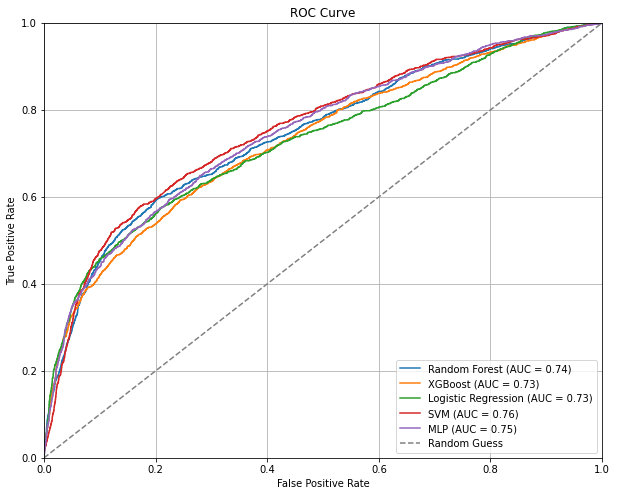

In [72]:
# roc曲线
classifiers = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Logistic Regression': lr,
    'SVM': svm,
    'MLP': mlp
}

# 训练模型并绘制ROC曲线
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    y_pred_proba = clf.predict_proba(x_test_2)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 调优

In [73]:
param_grid = {
    #'num_leaves': [31, 63, 127], 
    #'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [4,5,6,7,8]
}

In [77]:
cv =5

# 网格搜索
grid_search = GridSearchCV(rf, #  rf模型
                           param_grid,  # 参数
                           scoring='accuracy',  # 评估指标 
                           cv=cv,  # 5折交叉验证
                           n_jobs=-1  
                          ) 

In [78]:
grid_search.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=1000,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 500, 800, 1000]},
             scoring='accuracy')

In [79]:
grid_search.best_params_ 

{'max_depth': 8, 'n_estimators': 800}

In [81]:
# rf after grid search
rf = RandomForestClassifier(n_estimators=800, random_state=1, max_depth=8)
rf.fit(x_train_smote,y_train_smote)

y_pred = rf.predict(x_test_2)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      5841
         1.0       0.48      0.57      0.52      1659

    accuracy                           0.77      7500
   macro avg       0.67      0.70      0.68      7500
weighted avg       0.78      0.77      0.77      7500

0.7669333333333334


In [82]:
# 特征重要性
feature_importance = rf.feature_importances_

for i, feature_name in enumerate(x_test_2.columns):
    print(f"{feature_name}: {feature_importance[i]}")
    
df_importance = pd.DataFrame({
    'columns':x_test_2.columns,
    'importance':feature_importance
})
df_importance.sort_values(by='importance',ascending=False)

pc1: 0.1794628055670118
pc2: 0.05655779604204504
pc3: 0.05677020262951203
pc4: 0.16169211802921465
pc5: 0.06397662205045883
pc6: 0.12192557009983586
pc7: 0.08369807237117192
pc8: 0.04743014656595694
pc9: 0.035373345703230544
pc10: 0.03734172951282814
pc11: 0.10821048657078804
pc12: 0.04756110485794621


,columns,importance
0,pc1,0.179463
3,pc4,0.161692
5,pc6,0.121926
10,pc11,0.108210
6,pc7,0.083698
4,pc5,0.063977
2,pc3,0.056770
1,pc2,0.056558
11,pc12,0.047561
7,pc8,0.047430


# 预测数据

In [83]:
target_x = pd.read_excel('target_data.xls')
target_x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [84]:
target_x = target_x.drop("ID",axis=1)
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    upper_bound = df[col].quantile(0.95)
    lowwer_bound = df[col].quantile(0.05)
    std = df[col].std()
    df[col] = np.where(df[col] > Q3 + 1.5 * std, upper_bound, df[col])
    df[col] = np.where(df[col] < Q1 - 1.5 * std, lowwer_bound, df[col])
# for col in target_x.select_dtypes(include=[np.number]).columns:
#     median = target_x[col].median()
#     std = target_x[col].std()
#     outliers = (target_x[col] - median).abs() > 3 * std
#     target_x.loc[outliers, col] = median

In [85]:
target_x["GRAD_SCHOOL"] = (target_x["EDUCATION"] == 1).astype("category")
target_x["UNIVERSITY"] = (target_x["EDUCATION"] == 2).astype("category")
target_x["HIGH_SCHOOL"] = (target_x["EDUCATION"] == 3).astype("category")
target_x.drop('EDUCATION',axis=1,inplace=True)
target_x['MALE']=(target_x['SEX']==1).astype('category')
target_x.drop('SEX',axis=1,inplace=True)
target_x['MARRIED']=(target_x['MARRIAGE']==1).astype('category')
target_x.drop('MARRIAGE',axis=1,inplace=True)
target_x['LIMIT_BAL'] = minmax.fit_transform(target_x['LIMIT_BAL'].values.reshape(-1,1))
target_x['AGE'] = minmax.fit_transform(target_x['AGE'].values.reshape(-1,1))

pay_list = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

for pay in pay_list:
    target_x[pay] = minmax.fit_transform(target_x[pay].values.reshape(-1,1))
    
for i in range(1,7):
    target_x['BILL_AMT' + str(i)] = minmax.fit_transform(target_x['BILL_AMT' + str(i)].values.reshape(-1,1))
    target_x['PAY_AMT' + str(i)] = minmax.transform(target_x['PAY_AMT' + str(i)].values.reshape(-1,1))

In [86]:
target_x

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.146519,0.066874,0.086345,0.160138,0.080648,0.260979,False,True,False,False,True
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.146519,0.067169,0.086894,0.161080,0.080648,0.262516,False,True,False,False,False
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.147862,0.067644,0.086894,0.161080,0.081640,0.264821,False,True,False,False,False
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.148289,0.068137,0.087003,0.161174,0.081708,0.261747,False,True,False,False,True
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.148289,0.101032,0.091835,0.168616,0.081331,0.261501,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.154041,0.085201,0.089091,0.163008,0.085606,0.261747,False,False,True,True,True
29996,0.141414,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.148145,0.069567,0.091285,0.160259,0.080648,0.260979,False,False,True,True,False
29997,0.020202,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.146519,0.066220,0.098424,0.164094,0.082631,0.263361,False,True,False,True,False
29998,0.070707,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.222531,0.069456,0.086991,0.161952,0.133165,0.262365,False,False,True,True,True


In [87]:
# z主成分分析
pc=12
pca = PCA(n_components=pc)
pca.fit(target_x)

target_x = pd.DataFrame(pca.transform(target_x))
target_x.columns = ['pc' + str(i) for i in range(1,pc+1)]

In [88]:
target_x

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.752402,0.286480,-0.359027,-0.300631,-0.028515,-0.285580,-0.136655,0.349715,0.089590,0.038647,0.009846,0.047475
1,0.553288,-0.558514,-0.439862,0.163538,0.117075,-0.081716,-0.013475,-0.110358,0.035089,-0.035765,0.010331,0.248600
2,0.548801,-0.533772,-0.437689,0.153216,-0.005013,-0.023969,0.097251,-0.023128,-0.005817,0.000738,0.003906,0.005490
3,0.759854,0.318152,-0.342895,-0.301149,0.064371,-0.096638,0.023109,0.001165,-0.070789,-0.004720,0.008784,0.001177
4,0.710436,0.228978,0.654461,-0.401684,-0.083297,0.013899,0.299852,-0.070251,-0.111472,-0.008861,0.006838,0.046006
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.041285,0.864758,0.787447,0.568877,0.007780,0.104029,-0.177652,0.001518,-0.032392,-0.007030,0.021307,-0.003568
29996,-0.258165,0.033305,0.689627,1.017699,-0.244985,0.039281,0.088205,-0.126239,-0.018476,0.042420,0.016836,0.049873
29997,0.524415,-0.680342,0.566841,0.095483,0.245297,-0.086138,0.162631,0.346741,0.177729,0.086568,-0.001597,0.095519
29998,-0.039096,0.868152,0.787166,0.576903,-0.050137,-0.075651,-0.052669,0.041507,-0.025771,0.050546,0.014575,-0.134337


In [89]:
target_input = rf.predict(target_x)
target_input

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
input_data = pd.read_excel('target_data.xls')
input_id = input_data['ID']
input_id

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64

In [92]:
output = pd.DataFrame({
    'id':input_id,
    'output':target_input
})
output

,id,output
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
29995,29996,0.0
29996,29997,0.0
29997,29998,0.0
29998,29999,0.0


In [93]:
output.to_excel('output.xls',index=False)

/var/folders/vy/6ss332894_97lg8pwm9cm5hc0000gn/T/ipykernel_10755/3462582291.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  output.to_excel('output.xls',index=False)
